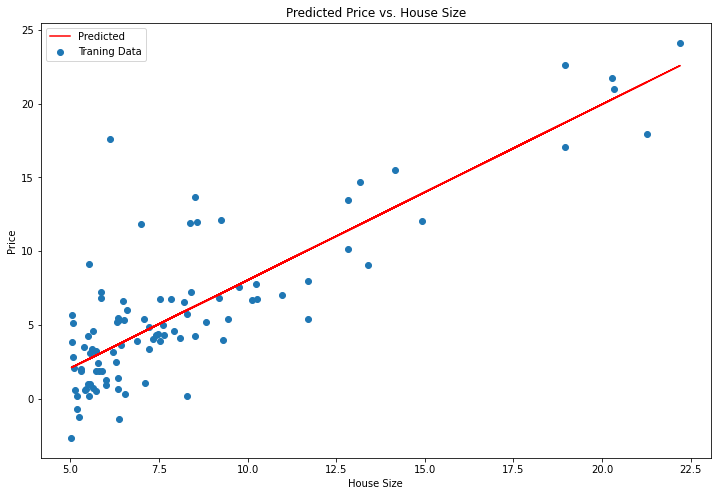

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt

path='ex1data1.txt'
#x_input
x=torch.from_numpy(np.loadtxt(path,delimiter=',',usecols=(0))).float().unsqueeze(1)

#y_input
y=torch.from_numpy(np.loadtxt(path,delimiter=',',usecols=(1))).float().unsqueeze(1)
#define LinearRegression model,(1,1)means dimension of the weight matrix
model=torch.nn.Linear(1,1)

#define cost function
loss_fn=torch.nn.MSELoss(reduction='mean')

optimizer=torch.optim.SGD(model.parameters(),lr=1e-2)

for t in range(10000):
    model.train()
    optimizer.zero_grad()
    #feed the input_x into the linear_regression model,
    #the weight matrix internal the model has a dimension of (1,1)
    y_pred=model(x)
    #computing the loss
    loss=loss_fn(y_pred,y)
    #损失函数求导
    loss.backward()
    optimizer.step()

    

predicted=model(x).detach_().numpy()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, predicted, 'r', label='Predicted')
ax.scatter(x, y, label='Traning Data')
ax.set_title('Predicted Price vs. House Size')
ax.set_xlabel('House Size')
ax.set_ylabel('Price')
plt.legend()
plt.show()

